In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import f_oneway,ttest_ind
%matplotlib inline

# Wine: What's Price Got To Do With It?

In [64]:
wine_data_og = pd.read_csv('winemag-data-130k-v2.csv')
wine_data = wine_data_og[['country','points','price','variety',]]


In [4]:
wine_data_variety = wine_data.dropna(subset=['variety'])
wine_data_no_blend = wine_data_variety[wine_data_variety['variety'].apply(lambda x: 'Blend' not in x)]
wine_data_less_price = wine_data[np.isfinite(wine_data['price'])]

### Breakdown of Variables Used


Country: the country that the wine is from<br>
Variety: the type of grapes used to make the wine (ie Pinot Noir)<br>
Points: the number of points WineEnthusiast rated the wine on a scale of 1-100 (though they say they only post reviews for wines that score >=80)<br>
Price: the cost for a bottle of the wine

### How are the wine scores determined?
This data set does not contain any wines that score below 80. Therefore, it's important to know what the criterea is for a wine that makes it into the 80+ point range. According to Wine Enthusiast, this is how wine scores are determined:<br><br>

Classic 98-100: The pinnacle of quality.<br>

Superb 94-97: A great achievement.<br>

Excellent 90-93: Highly recommended.<br>

Very Good 87-89: Often good value; well recommended.<br>

Good 83-86: Suitable for everyday consumption; often good value.<br>

Acceptable 80-82: Can be employed in casual, less-critical circumstances.<br>

Wines receiving a rating below 80 are not reviewed.<br>

## The Countries

### Amount of Wines from Each County

A simple count of the amount of the countries shows that the US, France, and Italy are the top 3 countries that appear in this dataset, with the US showing up more more than France and Italy combined. 



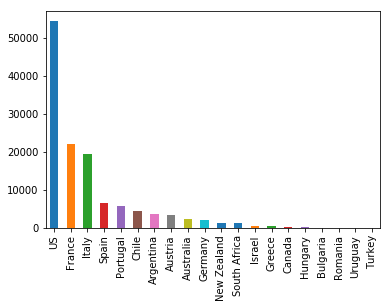

In [8]:
wine_data.country.value_counts().head(20).plot(kind='bar')

#### But these numbers do not reflect the top wine producing countries:

A quick Google search shows that these numbers do not match the order of top producing countries. This is probably because the study was an American study, as opposed to a global study where a wider range of wines would be available. 

This is important to note because it shows a sampling bias in that the distribution of wines in the dataset isn't a true reflection of gloabl wine production.

Here are the preliminary figures for 2016 (in million hectoliters) for the biggest wine producers according to OIV statistics.

1. Italy, 48.8 Mhl
2. France, 41.9 Mhl
3. Spain, 37.8 Mhl
4. USA, 22.5 Mhl
5. Australia, 12.5 Mhl
6. China, 11.5 Mhl
7. Chile, 10.1 Mhl
9. South Africa, 9.1 Mhl
10. Argentina, 8.8 Mhl

### Countries with Highest Quality Wines

Even though the US, France, and Italy are the 3 most common wines in the dataset, they do not appear in the top 3 for quality of wines. This suggests there could be a lot of variance in quality which we will verify later. 



/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


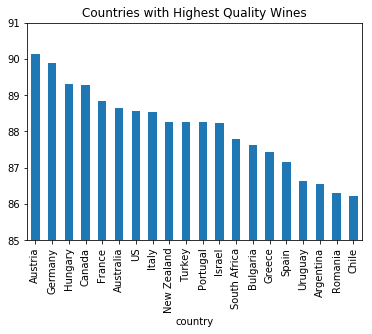

In [13]:
top20_countries_mostcommon_list = wine_data.country.value_counts().head(20).index.values.tolist()

points_country = wine_data_no_blend[wine_data.country.isin(top20_countries_mostcommon_list)][['points','country']]
countrypoints_group = points_country.groupby('country')
countrypoints_mean = countrypoints_group.mean()

highestquality_bycountry = countrypoints_mean.sort_values(by='points', ascending=False).head(20).plot(kind='bar', ylim=(85,91), legend=None,title="Countries with Highest Quality Wines", )


### Austria, Germany, and Hungary have, on average, the highest quality wine...

On average, Austria, Germany, and Hungary have the highest quality of wine. Considering these countries appear much less than 10,000 times in the dataset - it suggests that those countries produce a more consistant quality of wine. 

## How Are the Points Distributed?

The histogram below shows all the wines in the data set (apart from null values) and how their points are distributed.

/usr/local/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


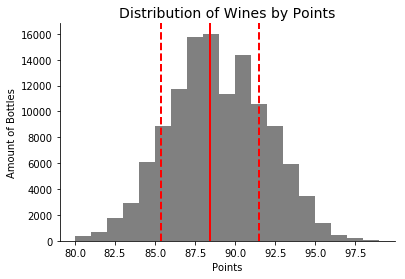

In [9]:
plt.hist(wine_data_less_price['points'], bins=range(80,100), color='grey')
plt.axvline(wine_data_less_price['points'].mean(), color='r', linestyle='solid', linewidth=2)
plt.axvline(wine_data_less_price['points'].mean() + wine_data_less_price['points'].std(), color='r', linestyle='dashed', linewidth=2)
plt.axvline(wine_data_less_price['points'].mean()-wine_data_less_price['points'].std(), color='r', linestyle='dashed', linewidth=2)

plt.title('Distribution of Wines by Points', fontsize=14)
plt.xlabel('Points')
plt.ylabel('Amount of Bottles')
ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False) 
plt.show()

### Most of These Wines are Rated Better than 'Good'

The average bottle of wine is scored at 88 points which is considered "Very Good - Often good value; well recommended" by the reviewers. 88 points also happens to be the most common score given in this dataset. 

most wines in the dataset fall between 85 and 91 points which are considered good to excellent wines. 

In [16]:
points_mode = stats.mode(wine_data['points'])

points_mode

ModeResult(mode=array([88]), count=array([17207]))

## How Are the Prices of These Wines Distributed?

Now we know that most of these wines are pretty good, it would be helpful to know how much they cost. 

/usr/local/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


<function matplotlib.pyplot.show>

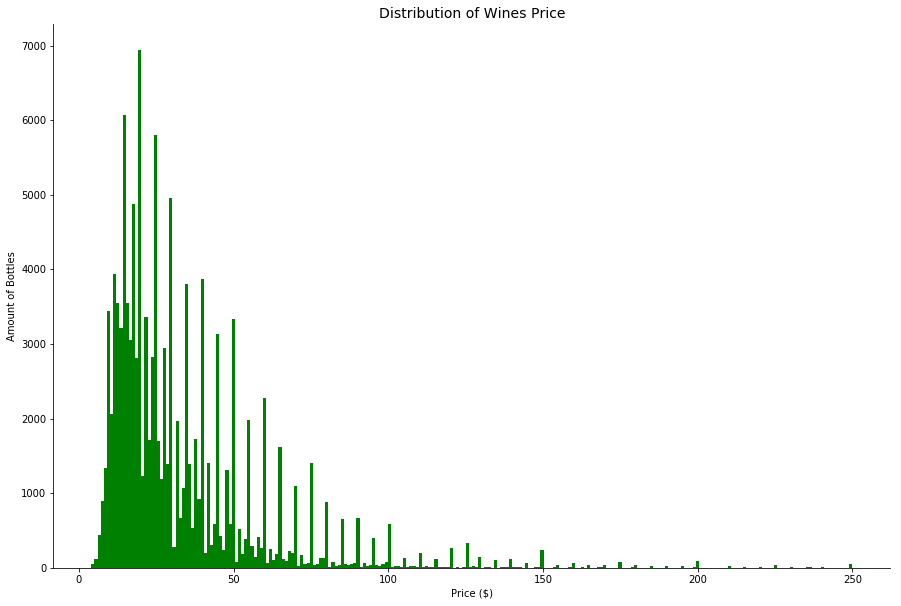

In [90]:
filter_wine_prices_250 = wine_data_less_price[(wine_data_less_price['price']>=4) & (wine_data_less_price['price']<=250)]
filter_wine_prices_50 = wine_data_less_price[(wine_data_less_price['price']>=4) & (wine_data_less_price['price']<=50)]


plt.figure(figsize=(15, 10))

plt.hist(filter_wine_prices_250['price'], bins='auto', color='green')
plt.title('Distribution of Wines Price', fontsize=14)
plt.xlabel('Price ($)')
plt.ylabel('Amount of Bottles')
ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False) 
plt.show


#more likely that bottles are priced at 10$ intervals

### There Are Not Many Wines that Cost More than 100 dollars

- The historgram above shows the range of wines priced from 4 to 250 dollars. Though the range actually goes all the way  up to 3300 dollars. 
- The pattern of the distrubution is choppy and reflects that bottles of wine tend to be priced in 10 dollar intervals.

###### If you're curious most expenive bottle is Château les Ormes Sorbet, 2013 - a Bordeaux-style Red Blend from France. Suprisingly, it scored only 88 points.

In [27]:
max(wine_data_less_price['price'])

3300.0

In [53]:
find_3300 = wine_data_og[wine_data_og['price']==3300]

print(find_3300['title'],find_3300['country'],find_3300['variety'],find_3300['points'])

80290    Château les Ormes Sorbet 2013  Médoc
Name: title, dtype: object 80290    France
Name: country, dtype: object 80290    Bordeaux-style Red Blend
Name: variety, dtype: object 80290    88
Name: points, dtype: int64


## A Closer Look: Prices Start to Drop Significantly at 50 Dollar Mark

/usr/local/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


<function matplotlib.pyplot.show>

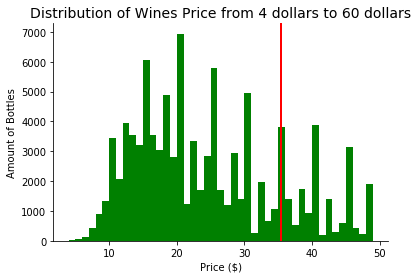

In [101]:
plt.hist(filter_wine_prices_50['price'], bins=range(4,50), color='green')
plt.axvline(wine_data_less_price['price'].mean(), color='r', linestyle='solid', linewidth=2)
plt.title('Distribution of Wines Price from 4 dollars to 60 dollars', fontsize=14)
plt.xlabel('Price ($)')
plt.ylabel('Amount of Bottles')
ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False) 

plt.show

### Mean and Mode

A closer look at wine prices shows us that:
- The average bottle of wine costs 35 dollars 
- The most commonly priced wine is 20 dollars
 


In [51]:
price_mode = stats.mode(wine_data_less_price['price'])

price_mode

ModeResult(mode=array([ 20.]), count=array([6940]))

In [47]:
np.mean(wine_data_less_price['price'])

35.363389129985535

## The Relationship Between Points and Price for All Wines

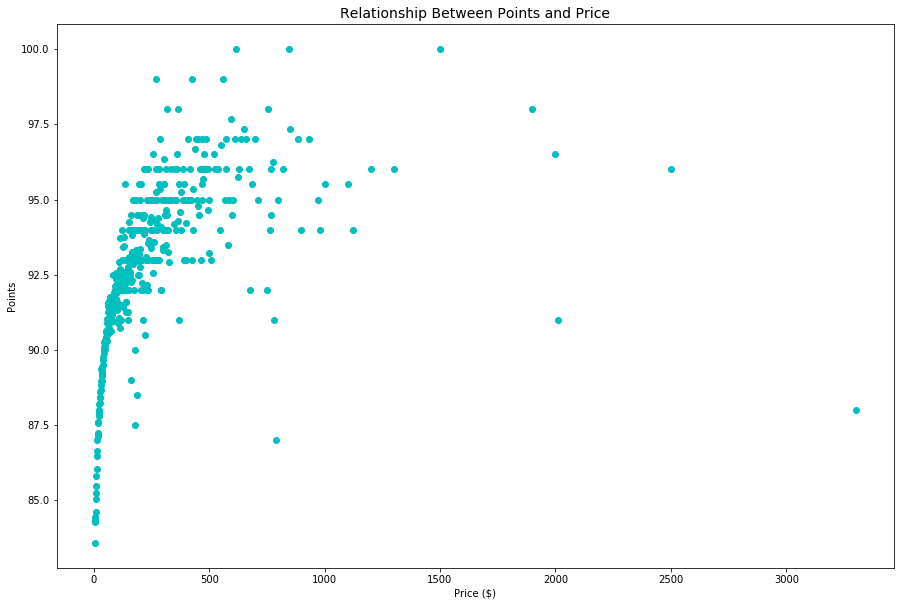

In [103]:
price_v_points_3300 = wine_data_less_price[(wine_data_less_price['price']>=4) & (wine_data_less_price['price']<=3300)]
price_v_points_agg_3300 = price_v_points_3300.groupby('price', as_index=False)['points'].agg(np.mean)


plt.figure(figsize=(15, 10))

plt.scatter(price_v_points_agg_3300['price'], price_v_points_agg_3300['points'], color='c')
plt.title('Relationship Between Points and Price for All Wines', fontsize=14)
plt.xlabel('Price ($)')
plt.ylabel('Points')
plt.show()

- As we might have guessed the relationship between price and points has a positive correlation.
- This is expecially the case for wines that scored between 80 and 90 points. 
- After 90 points, the variability gets a little more dispersed. 

## Taking a Closer Look at Price vs Points: At what price does wine point evalution become less predictable?


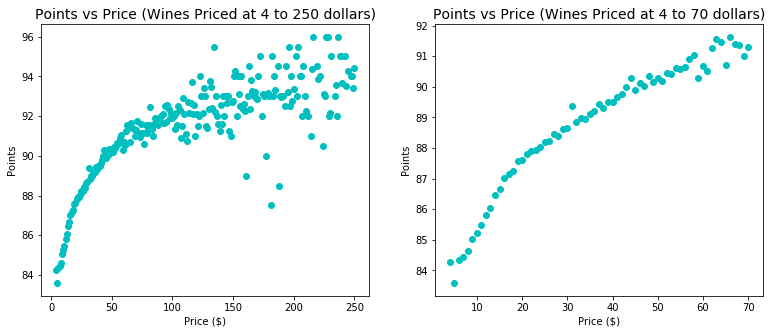

In [126]:
#price_v_points20 = wine_data_less_price[(wine_data_less_price['price']>=4) & (wine_data_less_price['price']<=30)]
#price_v_points_agg_20 = price_v_points20.groupby('price', as_index=False)['points'].agg(np.mean)

price_v_points_70 = wine_data_less_price[(wine_data_less_price['price']>=4) & (wine_data_less_price['price']<=70)]
price_v_points_agg_70 = price_v_points_60.groupby('price', as_index=False)['points'].agg(np.mean)

price_v_points250 = wine_data_less_price[(wine_data_less_price['price']>=4) & (wine_data_less_price['price']<=250)]
price_v_points_agg_250 = price_v_points250.groupby('price', as_index=False)['points'].agg(np.mean)


price_v_points70_250 = wine_data_less_price[(wine_data_less_price['price']>=70) & (wine_data_less_price['price']<=250)]


plt.figure(figsize=(20, 5))

plt.subplot(1,3,1)
plt.scatter(price_v_points_agg_250['price'], price_v_points_agg_250['points'], color='c')
plt.title('Points vs Price (Wines Priced at 4 to 250 dollars)', fontsize=14)
plt.xlabel('Price ($)')
plt.ylabel('Points')

plt.subplot(1,3,2)
plt.scatter(price_v_points_agg_70['price'], price_v_points_agg_70['points'], color='c')
plt.title('Points vs Price (Wines Priced at 4 to 70 dollars)', fontsize=14)
plt.xlabel('Price ($)')
plt.ylabel('Points')



#plt.subplot(1,3,3)
#plt.scatter(price_v_points_agg_20['price'], price_v_points_agg_20['points'], color='c')
#plt.title('Points vs Price (Wines Priced at 4 to 20 dollars)', fontsize=14)
#plt.xlabel('Price ($)')
#plt.ylabel('Points')


plt.show()

### After the 60 dollar mark, the wine point evaluation starts to become a little less predicatable

- Looking at the scattergraph on the left, one could say that once you start spending money on wine priced above 60 dollars, the price to quality ratio becomes more dispersed. 

### After the 20 dollar mark, the line starts to even out as the more money you spend does not increase

- There is an inflection point at around 20 points 
- Looking at the graph on the right, the price/point relationship varies slightly between 4 to 20 and 20 to 70. 
- There is a higher difference in quality of wines when you have a budget higher than 20 dollars. 



In [122]:
stats.pearsonr(wine_data_less_price['price'], wine_data_less_price['points'])

(0.41616674186062297, 0.0)

there is a .41 correlation
1 would be perfect correlation
p value is 0 so is significant

In [124]:
stats.pearsonr(price_v_points250['price'], price_v_points250['points'])

(0.53035583938010877, 0.0)

In [125]:
stats.pearsonr(price_v_points_70['price'], price_v_points_70['points'])

(0.53438498500600784, 0.0)

In [127]:
stats.pearsonr(price_v_points70_250['price'], price_v_points70_250['points'])

still positive, but not realty as strong as lower priced wines

(0.22281478907421418, 3.5918824159978351e-112)

<br><br><br><br><br><br>

# What does all this tell us about how we should buy our wine? 



# Question 1
## Which quality of wine can one get for less than 20 dollars?

##### All else being equal, if I picked a bottle of wine at random, would it matter if I spent say 10 dollars or 15 dollars?

I'll be looking at 3 different groups of prices. 

$10 and Under
$11 - $15
$16 - $20

One way to visualize this is a box plot comparing the price of the bottles to the distribution in points. The box plot is nice because you get an idea of the median and spread of the data and can easily compare between groups. Does the group label account for differences in variance?

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-vie

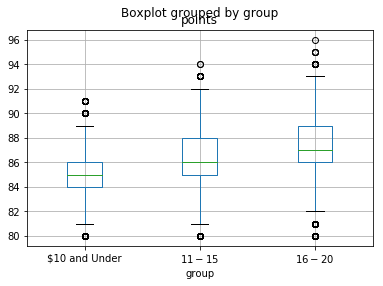

In [13]:
price_below_10 = wine_data[(wine_data['price'] <= 10)]
price_11to15 = wine_data[(wine_data['price'] > 10) & (wine_data['price'] <= 15)]
price_16to20 = wine_data[(wine_data['price'] > 15) & (wine_data['price'] <= 20)]

price_below_10['group'] = '$10 and Under'
price_11to15['group'] = '$11 - $15'
price_16to20['group'] = '$16 - $20'

price_all_global = price_below_10.append(price_11to15).append(price_16to20)

price_all_global.boxplot(column='points',by='group')


There is overlap between the groups, but the boxplot confirms that as I spend more money on my wine the trend is going up. 

To confirm this hypothesis we can run an ANOVA which will tell us if there are statiscally significant differences for point value between these groups. The ANOVA will allow me to compare more than two groups, whereas a t-test is only valid for two groups.




#.05 .01 .001

In [113]:
ANOVA

F,p = f_oneway(price_below_10['points'],price_11to15['points'],price_16to20['points'])

p == 0


True

In [ ]:
A t- test between groups will confirm whether..

In [114]:
t,p = ttest_ind(price_below_10['points'],price_11to15['points'])
t1,p1 = ttest_ind(price_11to15['points'],price_16to20['points'])

print(p)
print(p1)

0.0
0.0


T test shows that there is a difference (statisically) between 10 below and 15

#### Conclusion: These groups are statistically different


# Question 2
## Is there a particular country that will increase my chances of getting a better quality bottle of wine for 20 dollars or lower?


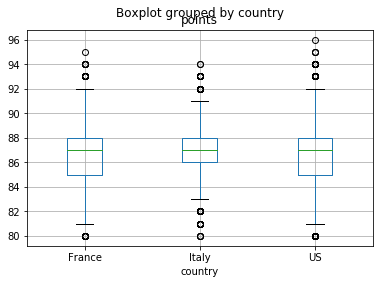

In [117]:
price_below_20_usa = wine_data[(wine_data['price'] <= 20) & (wine_data['country'] == 'US')]
price_below_20_france = wine_data[(wine_data['price'] <= 20) & (wine_data['country'] == 'France')]
price_below_20_italy = wine_data[(wine_data['price'] <= 20) & (wine_data['country'] == 'Italy')]

price_below_20_all = price_below_20_usa.append(price_below_20_france).append(price_below_20_italy)

price_below_20_all.boxplot(column='points',by='country')


In [128]:
#F,p = f_oneway(price_below_20_usa['points'],price_below_20_france['points'],price_below_20_italy['points'])

#print(p)

The results of the t-test indicate significant differences between the groups (t="the value", p < p_that_you_care_about)

In [119]:
t_usa_france, p_usa_france = ttest_ind(price_below_20_usa['points'],price_below_20_france['points'])
t_france_italy, p_france_italy = ttest_ind(price_below_20_france['points'],price_below_20_italy['points'])
t_usa_italy, p_usa_italy = ttest_ind(price_below_20_usa['points'],price_below_20_italy['points'])

print(t_usa_france)
print(p_usa_france)



-8.60045449297
8.46334227582e-18


In [120]:
print(t_france_italy)
print(p_france_italy)

p value - cusp of significance (.05)(no difference between french.italian wines)

2.13908347874
0.0324471065445


In [121]:
print(t_usa_italy)
print(p_usa_italy)

-6.10516991689
1.04547798583e-09


# Question 3
## Is there a better chance of getting a higher quality (90) wine from a particular country?

In [129]:
topvari_us_90_points = wine_data_less_price[(wine_data_less_price['country'] == 'US') & (wine_data_less_price['points'] >= 90)]
topvari_us_agg90 = topvari_us_90_points.groupby('price', as_index=False)['points'].agg(np.mean)


topvari_france_90points = wine_data_less_price[(wine_data_less_price['country'] == 'France') & (wine_data_less_price['points'] >= 90)]
topvari_france_agg90 = topvari_france_90points.groupby('price', as_index=False)['points'].agg(np.mean)

topvari_italy_90points = wine_data_less_price[(wine_data_less_price['country'] == 'Italy') & (wine_data_less_price['points'] >= 90)]
topvari_italy_agg90 = topvari_italy_90points.groupby('price', as_index=False)['points'].agg(np.mean)



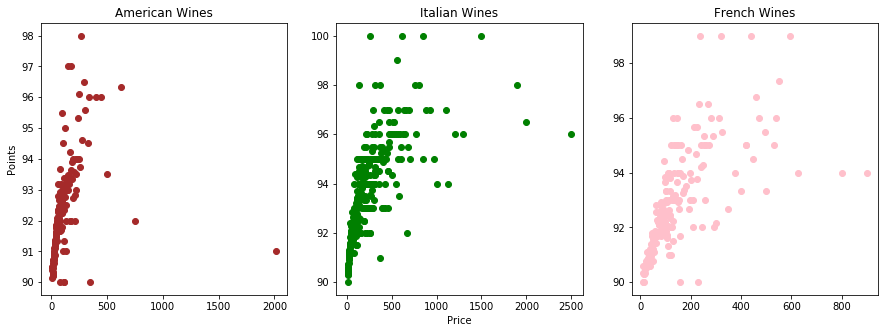

In [130]:
plt.figure(figsize=(15, 5))

plt.subplot(1,3,1)
plt.scatter(topvari_us_agg90['price'],topvari_us_agg90['points'], color='brown', label='top 20')
plt.title('American Wines')
plt.ylabel('Points')

plt.subplot(1,3,2)
plt.scatter(topvari_france_agg90['price'],topvari_france_agg90['points'], color='green', label='top 20')
plt.title('Italian Wines')
plt.xlabel('Price')

plt.subplot(1,3,3)
plt.scatter(topvari_italy_agg90['price'],topvari_italy_agg90['points'], color='pink', label='top 20')
plt.title('French Wines')

plt.show()

### American Wines

### Italian Wines

### French Wines

# Future Research
- How inter reliable the raters
- are the consistant/tougher/de-noise
-assign relatibilty for raters
- histogram for reviewers 
- mean / variance - are distributions different
t - test

.


.
.

In [ ]:
.